In [24]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import importlib
import random

import mysklearn.myutils as myutils
import mysklearn.plotutils as plotutils
import mysklearn.mypytable
importlib.reload(mysklearn.mypytable)
from mysklearn.mypytable import MyPyTable 

import mysklearn.myclassifiers as myclassifiers
from mysklearn.myclassifiers import MyKNeighborsClassifier, MyNaiveBayesClassifier

import mysklearn.myevaluation as myevaluation

In [17]:
spotify_table = MyPyTable()
spotify_table.load_from_file("./input_data/sampled_cleaned_spotify_tracks.csv")

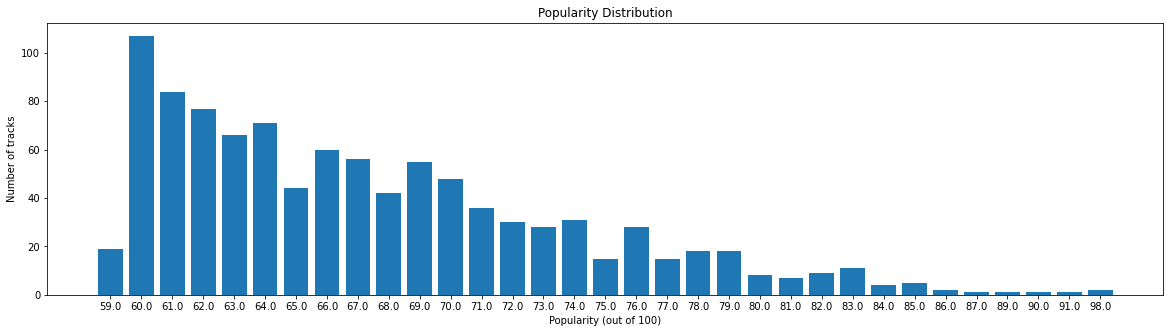

In [18]:
importlib.reload(myutils)

popularity_column = spotify_table.get_column("popularity")
unique_popularities = sorted(myutils.get_unique_values(popularity_column))
frequencies = myutils.get_frequency_of_multiple_values(unique_popularities, popularity_column)
plotutils.simple_bar_chart(unique_popularities, frequencies, ["Popularity (out of 100)", "Number of tracks", "Popularity Distribution"])

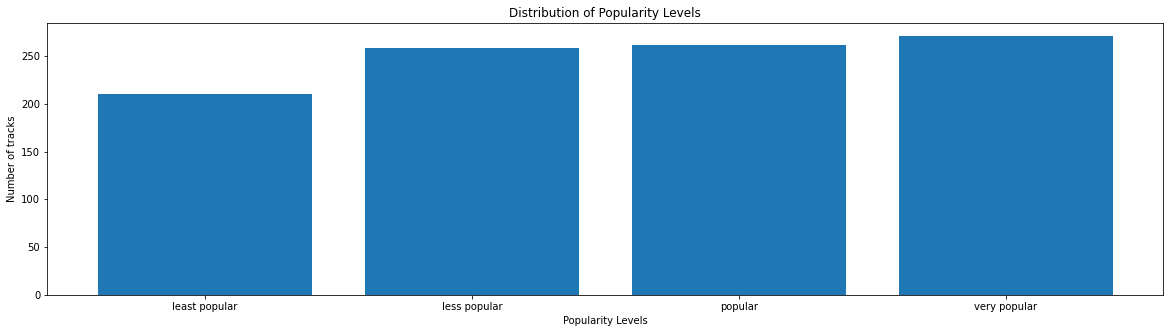

In [19]:
importlib.reload(myutils)

cutoffs = myutils.compute_equal_frequency_cutoffs(sorted(popularity_column), 4)
discretized_popularities = myutils.discretize_with_cut_offs(popularity_column, cutoffs)
unique_discretized_popularities = sorted(myutils.get_unique_values(discretized_popularities))
frequencies_discretized_popularities = myutils.get_frequency_of_multiple_values(unique_discretized_popularities, discretized_popularities)
plotutils.simple_bar_chart(unique_discretized_popularities, frequencies_discretized_popularities, ["Popularity Levels", \
    "Number of tracks", "Distribution of Popularity Levels"])

In [27]:
plt.figure(figsize=(12, 10))
mask = np.tril(spotify_table.data)
sns.heatmap(spotify_table.data, cmap="coolwarm", annot=True, fmt='.1g' ,square=True, mask=mask);

corr_df = df.corr()
corr_df.style.background_gradient(cmap="bwr").set_precision(2)

ValueError: invalid literal for int() with base 10: '83204.0'

<Figure size 864x720 with 0 Axes>

In [22]:
importlib.reload(myutils)
importlib.reload(myclassifiers)

X_data = [[instance[spotify_table.column_names.index("track_genre")], 
          instance[spotify_table.column_names.index("energy")],
          instance[spotify_table.column_names.index("danceability")],
          instance[spotify_table.column_names.index("liveness")]] for instance in spotify_table.data]
print(X_data[:20])
nb_accuracy = 0
nb_predictions, y_actual = [], []
skfold_splits = myutils.strat_cross_val_predict(10, X_data, discretized_popularities, 10)
for skfold_split in skfold_splits:
    for split in skfold_split:
        nb_clf = MyNaiveBayesClassifier()
        nb_clf.fit(split[0], split[2])
        predictions_naive = nb_clf.predict(split[1])
        nb_accuracy += myevaluation.accuracy_score(split[3], predictions_naive)
        y_actual += split[3]
        nb_predictions += predictions_naive

[['progressive-house', 0.912, 0.727, 0.118], ['country', 0.681, 0.377, 0.0504], ['reggae', 0.606, 0.853, 0.313], ['k-pop', 0.733, 0.791, 0.0423], ['indie-pop', 0.876, 0.636, 0.117], ['acoustic', 0.407, 0.66, 0.109], ['indie-pop', 0.541, 0.677, 0.125], ['british', 0.403, 0.443, 0.111], ['turkish', 0.582, 0.966, 0.112], ['synth-pop', 0.814, 0.706, 0.262], ['dancehall', 0.875, 0.816, 0.0346], ['disco', 0.703, 0.601, 0.571], ['chill', 0.294, 0.619, 0.103], ['soul', 0.363, 0.86, 0.101], ['metal', 0.997, 0.293, 0.415], ['rock-n-roll', 0.318, 0.576, 0.167], ['disco', 0.459, 0.918, 0.0532], ['j-pop', 0.669, 0.682, 0.145], ['british', 0.869, 0.576, 0.0573], ['blues', 0.885, 0.58, 0.146]]


In [21]:
importlib.reload(myutils)

print("Naive Bayes classifier: accuracy =", nb_accuracy/100, ", error rate =", 1 - nb_accuracy/100, \
    "\n\tprecision rate =", myevaluation.binary_precision_score(y_actual, nb_predictions), \
    ", recall = ", myevaluation.binary_recall_score(y_actual, nb_predictions), \
    ", F1 = ", myevaluation.binary_f1_score(y_actual, nb_predictions))

Naive Bayes classifier: accuracy = 0.35800000000000004 , error rate = 0.6419999999999999 
	precision rate = 0.3228346456692913 , recall =  0.3904761904761905 , F1 =  0.35344827586206895
